In [1]:
import pandas as pd
from os.path import join
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def custom_plots(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.grid(False)
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    sns.despine(ax=ax)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')

In [ ]:
src = "../data/"
dst = "./newsguard/"
with open(join(src, "dtypes_config.pickle"), "rb") as file:
    DTYPES = pkl.load(file)

In [ ]:
df_starters = pd.read_csv(join(src,
                      "discussions/",
                      "discussions_starters_aggregates.csv"),
                 usecols=[
                     "id",
                     "domain",
                     "Rating",
                     "Score",
                     "created_at"],
                 dtype=DTYPES)

len(df_starters)

9906259

In [5]:
df_starters['Rating_40'] = df_starters['Score'].apply(lambda x: 'T' if x > 40 else 'N')
df_starters['Rating_80'] = df_starters['Score'].apply(lambda x: 'T' if x > 80 else 'N')

In [6]:
df_starters["Rating"] = df_starters["Rating"].replace(
    {"0.0": "T", "1.0": "N"})

In [7]:
# compare value counts
df_starters["Rating"].value_counts(normalize=False)

T    9310435
N     595824
Name: Rating, dtype: int64

In [8]:
df_starters["Rating_40"].value_counts(normalize=False)

T    9387050
N     519209
Name: Rating_40, dtype: int64

In [9]:
df_starters["Rating_80"].value_counts(normalize=False)

T    8689594
N    1216665
Name: Rating_80, dtype: int64

In [10]:
df_starters["created_at"] = pd.to_datetime(df_starters["created_at"])
df_starters["day"] = df_starters["created_at"].dt.to_period("D")
df_starters["month"] = df_starters["created_at"].dt.to_period("M")
df_starters["week"] = df_starters["created_at"].dt.to_period("W")
# df_starters

/tmp/ipykernel_1680477/3663499612.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_starters["day"] = df_starters["created_at"].dt.to_period("D")
/tmp/ipykernel_1680477/3663499612.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_starters["month"] = df_starters["created_at"].dt.to_period("M")
/tmp/ipykernel_1680477/3663499612.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_starters["week"] = df_starters["created_at"].dt.to_period("W")


In [11]:
df_rating_week = df_starters\
    .groupby(["week", "Rating"])\
        .size().unstack().fillna(0)

df_trustworthy_weekly = df_rating_week["T"]
df_untrustworthy_weekly = df_rating_week["N"]

# cut first and last week
df_trustworthy_weekly = df_trustworthy_weekly[1:-1]
df_untrustworthy_weekly = df_untrustworthy_weekly[1:-1]

In [12]:
df_rating_40_week = df_starters\
    .groupby(["week", "Rating_40"])\
        .size().unstack().fillna(0)

df_trustworthy_40_weekly = df_rating_40_week["T"]
df_untrustworthy_weekly_40 = df_rating_40_week["N"]

df_trustworthy_40_weekly = df_trustworthy_40_weekly[1:-1]
df_untrustworthy_weekly_40 = df_untrustworthy_weekly_40[1:-1]

In [13]:
df_rating_80_week = df_starters\
    .groupby(["week", "Rating_80"])\
        .size().unstack().fillna(0)


df_trustworthy_80_weekly = df_rating_80_week["T"]
df_untrustworthy_weekly_80 = df_rating_80_week["N"]

df_trustworthy_80_weekly = df_trustworthy_80_weekly[1:-1]
df_untrustworthy_weekly_80 = df_untrustworthy_weekly_80[1:-1]

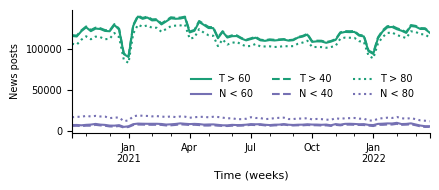

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 2))

df_trustworthy_weekly.plot(ax=ax, color="#1b9e77")
df_untrustworthy_weekly.plot(ax=ax, color="#7570b3")

df_trustworthy_40_weekly.plot(ax=ax, color="#1b9e77", linestyle="--")
df_untrustworthy_weekly_40.plot(ax=ax, color="#7570b3", linestyle="--")

df_trustworthy_80_weekly.plot(ax=ax, color="#1b9e77", linestyle=":")
df_untrustworthy_weekly_80.plot(ax=ax, color="#7570b3", linestyle=":")

ax.set_xlabel("Time (weeks)", fontsize=8)
ax.set_ylabel("News posts",
           fontsize=7)
ax.tick_params(axis="both", labelsize=7)

# add another legend for linetypes
ax.legend(["T > 60", "N < 60", 
           "T > 40", "N < 40", 
           "T > 80", "N < 80"],
           loc='upper right', 
           bbox_to_anchor=(0.98, 0.55), 
           ncol=3,
           frameon=False,
           fontsize=7)

custom_plots(ax=ax)

plt.tight_layout()

plt.savefig(join(dst, "news_posts_by_rating.pdf"),
            bbox_inches="tight",
            dpi=300)

plt.show()